C:\CondaEnvs\rdkit-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


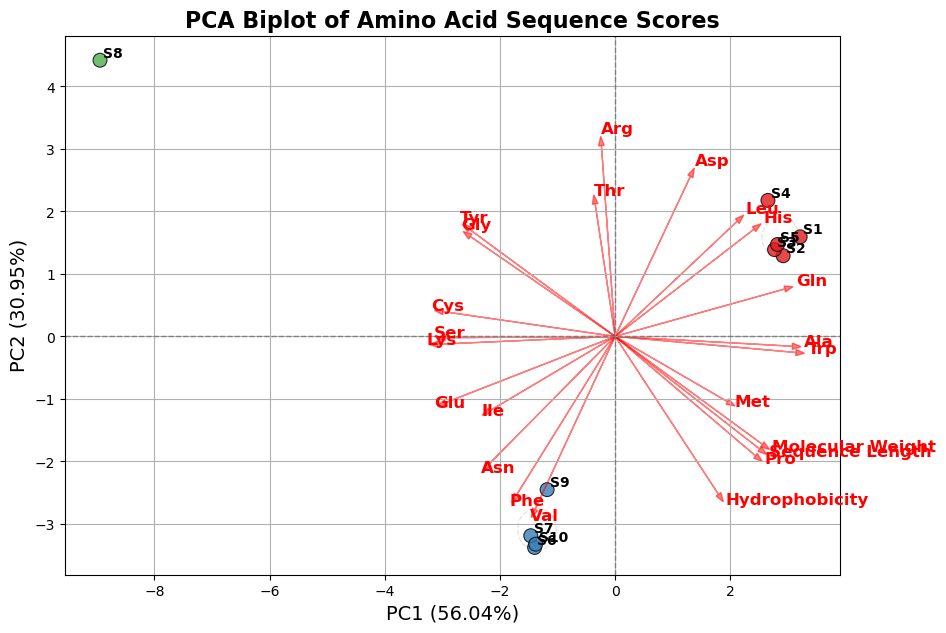

Explained variance by components: [0.56041033 0.30953272]
PCA results saved at: C:\Users\New User\Documents\priyanka\pca_klebsiella_proteins.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset (modify the path as needed)
csv_file = "C:\\Users\\New User\\Documents\\priyanka\\amino.csv"
df = pd.read_csv(csv_file)

# Extract numeric data (assuming the first column is an ID)
numeric_data = df.iloc[:, 1:]

# Standardize the data for PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=["PC1", "PC2"])

# Create new labels S1, S2, S3, ... for each protein
pca_df["Label"] = ["S" + str(i+1) for i in range(len(pca_df))]

# Perform K-Means clustering (3 clusters; adjust as needed)
kmeans = KMeans(n_clusters=3, random_state=42)
pca_df["Cluster"] = kmeans.fit_predict(pca_result)

# Save the PCA results (with new labels) to CSV
pca_csv_file = "C:\\Users\\New User\\Documents\\priyanka\\pca_klebsiella_proteins.csv"
pca_df.to_csv(pca_csv_file, index=False)

# Get PCA loadings for the original variables (features)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create the PCA biplot
fig, ax = plt.subplots(figsize=(10, 7))

# Plot the data points (colored by cluster) without the default legend
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=pca_df, palette="Set1",
                s=100, edgecolor="black", alpha=0.8, ax=ax, legend=False)

# Annotate each data point with its label (S1, S2, …)
for i in range(pca_df.shape[0]):
    ax.text(pca_df["PC1"].iloc[i] + 0.05, pca_df["PC2"].iloc[i] + 0.05, 
            pca_df["Label"].iloc[i], fontsize=10, fontweight='bold')

# Draw cluster boundaries using a rough circle (based on the mean distance)
for cluster_id in np.unique(pca_df["Cluster"]):
    cluster_points = pca_df[pca_df["Cluster"] == cluster_id][["PC1", "PC2"]].values
    center = cluster_points.mean(axis=0)
    radius = np.mean(np.linalg.norm(cluster_points - center, axis=1))
    circle = plt.Circle(center, radius, color='gray', alpha=0.2, linestyle='dashed', fill=False)
    ax.add_patch(circle)

# Draw arrows for the original features (loadings) and label them near the arrow tip
for i, feature in enumerate(numeric_data.columns):
    ax.arrow(0, 0, loadings[i, 0] * 3, loadings[i, 1] * 3, color='red', 
             alpha=0.5, head_width=0.1)
    ax.text(loadings[i, 0] * 3.2, loadings[i, 1] * 3.2, feature, color='red', 
            fontsize=12, fontweight='bold')

# Final plot adjustments
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)", fontsize=14)
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)", fontsize=14)
plt.title("PCA Biplot of Amino Acid Sequence Scores", fontsize=16, fontweight="bold")
plt.axhline(0, color='gray', linestyle='dashed', linewidth=1)
plt.axvline(0, color='gray', linestyle='dashed', linewidth=1)
plt.grid(True)
plt.show()

# Print explained variance and CSV file location
print("Explained variance by components:", pca.explained_variance_ratio_)
print(f"PCA results saved at: {pca_csv_file}")


C:\CondaEnvs\rdkit-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


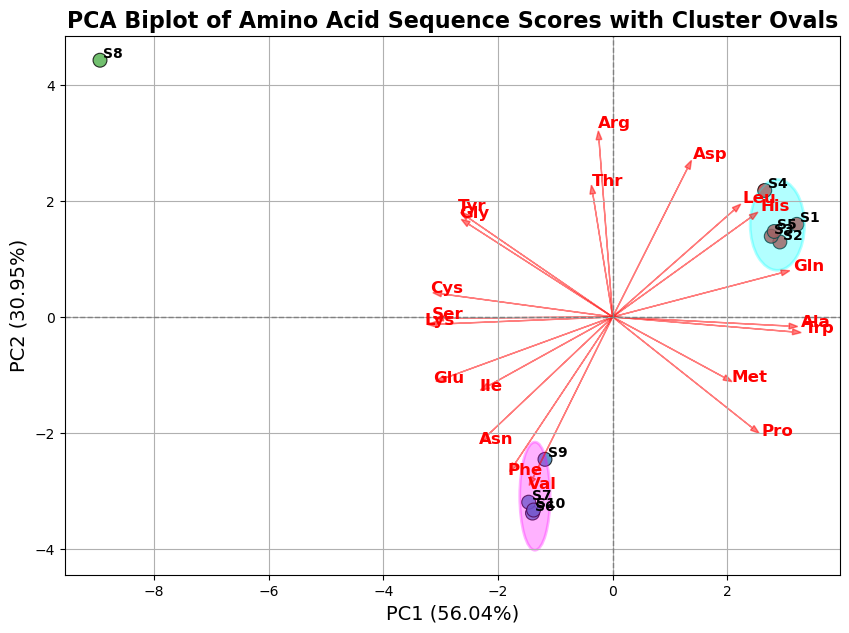

Explained variance by components: [0.56041033 0.30953272]
PCA results saved at: C:\Users\New User\Documents\priyanka\pca_klebsiella_proteins.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset (modify the path as needed)
csv_file = "C:\\Users\\New User\\Documents\\priyanka\\amino.csv"
df = pd.read_csv(csv_file)

# Extract numeric data (assuming the first column is an ID)
numeric_data = df.iloc[:, 1:]  # This includes Sequence Length, Hydrophobicity, Molecular Weight, & composition columns

# Standardize the data for PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=["PC1", "PC2"])

# Create new labels S1, S2, S3, ... for each protein
pca_df["Label"] = ["S" + str(i+1) for i in range(len(pca_df))]

# Perform K-Means clustering (3 clusters; adjust as needed)
kmeans = KMeans(n_clusters=3, random_state=42)
pca_df["Cluster"] = kmeans.fit_predict(pca_result)

# Save the PCA results (with new labels) to CSV
pca_csv_file = "C:\\Users\\New User\\Documents\\priyanka\\pca_klebsiella_proteins.csv"
pca_df.to_csv(pca_csv_file, index=False)

# Get PCA loadings for the original variables (features)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create the PCA biplot
fig, ax = plt.subplots(figsize=(10, 7))

# Plot the data points (colored by cluster) without the default legend
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=pca_df, palette="Set1",
                s=100, edgecolor="black", alpha=0.8, ax=ax, legend=False)

# Annotate each data point with its label (S1, S2, S3, …)
for i in range(pca_df.shape[0]):
    ax.text(pca_df["PC1"].iloc[i] + 0.05, pca_df["PC2"].iloc[i] + 0.05, 
            pca_df["Label"].iloc[i], fontsize=10, fontweight='bold')

# Draw cluster boundaries as big oval shapes using Ellipse patches
# Define bright colors for each cluster
color_dict = {0: 'cyan', 1: 'magenta', 2: 'yellow'}
for cluster_id in np.unique(pca_df["Cluster"]):
    cluster_points = pca_df[pca_df["Cluster"] == cluster_id][["PC1", "PC2"]].values
    center = cluster_points.mean(axis=0)
    std_x = cluster_points[:, 0].std()
    std_y = cluster_points[:, 1].std()
    factor = 2.5  # Increase this factor to make the oval bigger
    ellipse_width = std_x * factor * 2  # width covers roughly 2*std deviations scaled by factor
    ellipse_height = std_y * factor * 2
    ellipse = Ellipse(xy=center, width=ellipse_width, height=ellipse_height,
                      angle=0, edgecolor=color_dict.get(cluster_id, 'black'),
                      fc=color_dict.get(cluster_id, 'black'), alpha=0.3, lw=2)
    ax.add_patch(ellipse)

# Draw arrows for features from column "Ala" to the last column in the data
# Find the starting index for "Ala"
if "Ala" in numeric_data.columns:
    start_index = numeric_data.columns.get_loc("Ala")
else:
    # If "Ala" is not found, you might need to adjust this based on your actual column names
    start_index = 0

for i in range(start_index, len(numeric_data.columns)):
    feature = numeric_data.columns[i]
    ax.arrow(0, 0, loadings[i, 0] * 3, loadings[i, 1] * 3, color='red', 
             alpha=0.5, head_width=0.1)
    ax.text(loadings[i, 0] * 3.2, loadings[i, 1] * 3.2, feature, color='red', 
            fontsize=12, fontweight='bold')

# Final plot adjustments
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)", fontsize=14)
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)", fontsize=14)
plt.title("PCA Biplot of Amino Acid Sequence Scores with Cluster Ovals", fontsize=16, fontweight="bold")
plt.axhline(0, color='gray', linestyle='dashed', linewidth=1)
plt.axvline(0, color='gray', linestyle='dashed', linewidth=1)
plt.grid(True)
plt.show()

# Print explained variance and CSV file location
print("Explained variance by components:", pca.explained_variance_ratio_)
print(f"PCA results saved at: {pca_csv_file}")


C:\CondaEnvs\rdkit-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


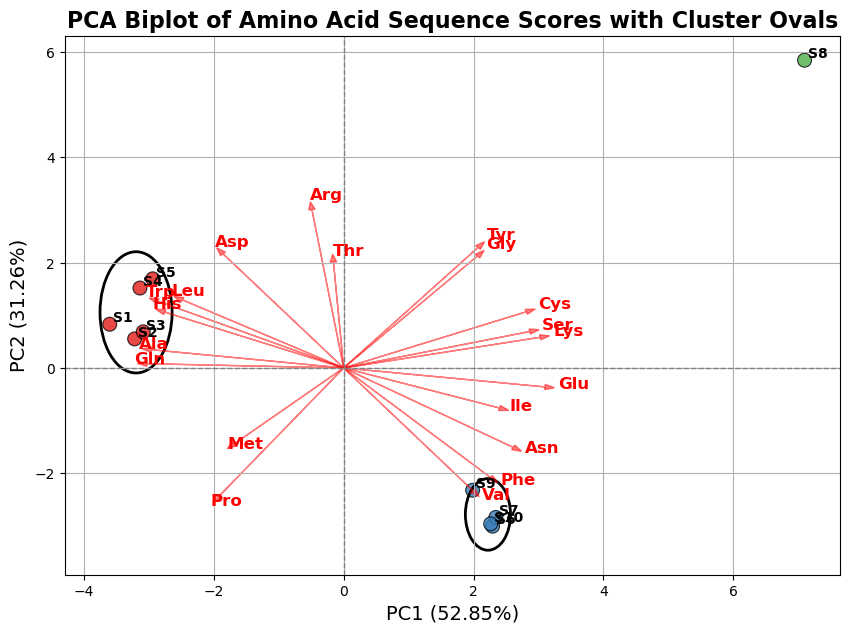

Explained variance by components: [0.52851654 0.31255938]
PCA results saved at: C:\Users\New User\Documents\priyanka\pca_proteins.csv
PCA biplot saved as image at: C:\Users\New User\Documents\priyanka\pca_biplot.png


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset (modify the path as needed)
csv_file = "C:\\Users\\New User\\Documents\\priyanka\\amino.csv"
df = pd.read_csv(csv_file)

# Extract numeric data (assuming the first column is an ID)
numeric_data = df.iloc[:, 1:]  # This includes all numeric columns (Sequence Length, Hydrophobicity, etc.)

# Standardize the data for PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=["PC1", "PC2"])

# Create new labels S1, S2, S3, ... for each protein
pca_df["Label"] = ["S" + str(i+1) for i in range(len(pca_df))]

# Perform K-Means clustering (3 clusters; adjust as needed)
kmeans = KMeans(n_clusters=3, random_state=42)
pca_df["Cluster"] = kmeans.fit_predict(pca_result)

# Save the PCA results (with new labels) to CSV
pca_csv_file = "C:\\Users\\New User\\Documents\\priyanka\\pca_proteins.csv"
pca_df.to_csv(pca_csv_file, index=False)

# Get PCA loadings for the original variables (features)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create the PCA biplot
fig, ax = plt.subplots(figsize=(10, 7))

# Plot the data points (colored by cluster) without the default legend
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=pca_df, palette="Set1",
                s=100, edgecolor="black", alpha=0.8, ax=ax, legend=False)

# Annotate each data point with its label (S1, S2, S3, …)
for i in range(pca_df.shape[0]):
    ax.text(pca_df["PC1"].iloc[i] + 0.05, pca_df["PC2"].iloc[i] + 0.05, 
            pca_df["Label"].iloc[i], fontsize=10, fontweight='bold')

# Draw cluster boundaries as bright ovals (only outline in dark color, transparent fill)
for cluster_id in np.unique(pca_df["Cluster"]):
    cluster_points = pca_df[pca_df["Cluster"] == cluster_id][["PC1", "PC2"]].values
    center = cluster_points.mean(axis=0)
    std_x = cluster_points[:, 0].std()
    std_y = cluster_points[:, 1].std()
    factor = 2.5  # Adjust to make the oval bigger or smaller
    ellipse_width = std_x * factor * 2  # Width covers roughly 2*std deviations scaled by factor
    ellipse_height = std_y * factor * 2
    # Draw an ellipse with no fill and a dark outline (black)
    ellipse = Ellipse(xy=center, width=ellipse_width, height=ellipse_height,
                      angle=0, edgecolor='black', fc='none', lw=2)
    ax.add_patch(ellipse)

# Draw arrows for features from column "Ala" to the last column in the data
# Find the starting index for "Ala"
if "Ala" in numeric_data.columns:
    start_index = numeric_data.columns.get_loc("Ala")
else:
    # If "Ala" is not found, set start_index to 0 (or adjust as needed)
    start_index = 0

for i in range(start_index, len(numeric_data.columns)):
    feature = numeric_data.columns[i]
    ax.arrow(0, 0, loadings[i, 0] * 3, loadings[i, 1] * 3, color='red', 
             alpha=0.5, head_width=0.1)
    ax.text(loadings[i, 0] * 3.2, loadings[i, 1] * 3.2, feature, color='red', 
            fontsize=12, fontweight='bold')

# Final plot adjustments
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)", fontsize=14)
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)", fontsize=14)
plt.title("PCA Biplot of Amino Acid Sequence Scores with Cluster Ovals", fontsize=16, fontweight="bold")
plt.axhline(0, color='gray', linestyle='dashed', linewidth=1)
plt.axvline(0, color='gray', linestyle='dashed', linewidth=1)
plt.grid(True)

# Save the generated plot as a PNG image (change file format if needed)
plot_file = "C:\\Users\\New User\\Documents\\priyanka\\pca_biplot.png"
plt.savefig(plot_file, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print explained variance and saved file location
print("Explained variance by components:", pca.explained_variance_ratio_)
print(f"PCA results saved at: {pca_csv_file}")
print(f"PCA biplot saved as image at: {plot_file}")


C:\CondaEnvs\rdkit-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


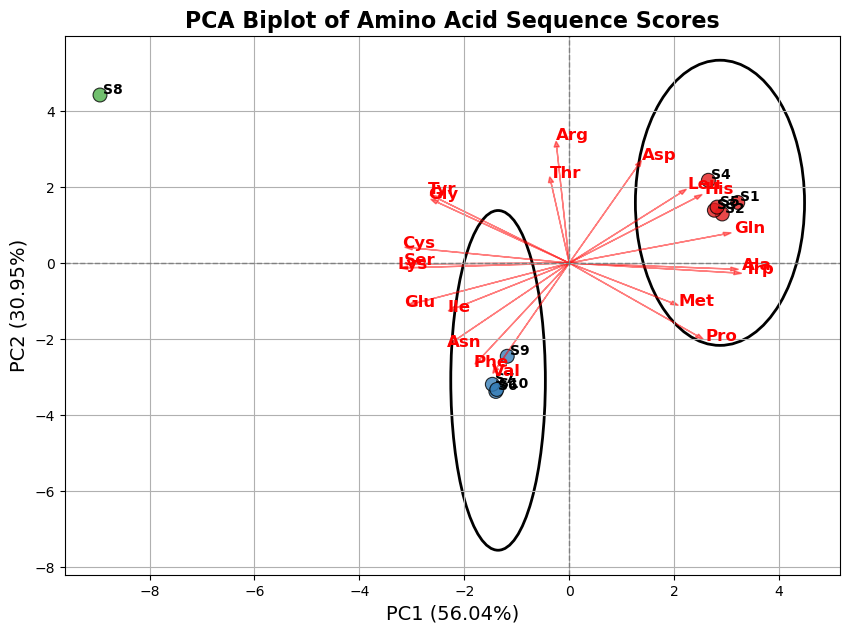

Explained variance by components: [0.56041033 0.30953272]
PCA results saved at: C:\Users\New User\Documents\priyanka\pca_klebsiella_proteins.csv
PCA biplot saved as image at: C:\Users\New User\Documents\priyanka\pca_biplot.png


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset (modify the path as needed)
csv_file = "C:\\Users\\New User\\Documents\\priyanka\\amino.csv"
df = pd.read_csv(csv_file)

# Extract numeric data (assuming the first column is an ID)
numeric_data = df.iloc[:, 1:]  # This includes all numeric columns

# Standardize the data for PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=["PC1", "PC2"])

# Create new labels S1, S2, S3, ... for each protein
pca_df["Label"] = ["S" + str(i+1) for i in range(len(pca_df))]

# Perform K-Means clustering (3 clusters; adjust as needed)
kmeans = KMeans(n_clusters=3, random_state=42)
pca_df["Cluster"] = kmeans.fit_predict(pca_result)

# Save the PCA results (with new labels) to CSV
pca_csv_file = "C:\\Users\\New User\\Documents\\priyanka\\pca_klebsiella_proteins.csv"
pca_df.to_csv(pca_csv_file, index=False)

# Get PCA loadings for the original variables (features)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create the PCA biplot
fig, ax = plt.subplots(figsize=(10, 7))

# Plot the data points (colored by cluster) without the default legend
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=pca_df, palette="Set1",
                s=100, edgecolor="black", alpha=0.8, ax=ax, legend=False)

# Annotate each data point with its label (S1, S2, S3, …)
for i in range(pca_df.shape[0]):
    ax.text(pca_df["PC1"].iloc[i] + 0.05, pca_df["PC2"].iloc[i] + 0.05, 
            pca_df["Label"].iloc[i], fontsize=10, fontweight='bold')

# Set custom width and height multipliers for the cluster ovals
width_multiplier = 8.5  # Adjust this to change oval width
height_multiplier = 12.0  # Adjust this to change oval height

# Draw cluster boundaries as bright ovals (only outline in dark color, transparent fill)
for cluster_id in np.unique(pca_df["Cluster"]):
    cluster_points = pca_df[pca_df["Cluster"] == cluster_id][["PC1", "PC2"]].values
    center = cluster_points.mean(axis=0)
    std_x = cluster_points[:, 0].std()
    std_y = cluster_points[:, 1].std()
    
    # Set different scaling factors for width and height
    ellipse_width = std_x * width_multiplier * 2  
    ellipse_height = std_y * height_multiplier * 2  

    # Draw an ellipse with no fill and a dark outline (black)
    ellipse = Ellipse(xy=center, width=ellipse_width, height=ellipse_height,
                      angle=0, edgecolor='black', fc='none', lw=2)
    ax.add_patch(ellipse)

# Draw arrows for features from column "Ala" to the last column in the data
if "Ala" in numeric_data.columns:
    start_index = numeric_data.columns.get_loc("Ala")
else:
    start_index = 0  # Default to the first column if "Ala" is not found

for i in range(start_index, len(numeric_data.columns)):
    feature = numeric_data.columns[i]
    ax.arrow(0, 0, loadings[i, 0] * 3, loadings[i, 1] * 3, color='red', 
             alpha=0.5, head_width=0.1)
    ax.text(loadings[i, 0] * 3.2, loadings[i, 1] * 3.2, feature, color='red', 
            fontsize=12, fontweight='bold')

# Final plot adjustments
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)", fontsize=14)
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)", fontsize=14)
plt.title("PCA Biplot of Amino Acid Sequence Scores", fontsize=16, fontweight="bold")
plt.axhline(0, color='gray', linestyle='dashed', linewidth=1)
plt.axvline(0, color='gray', linestyle='dashed', linewidth=1)
plt.grid(True)

# Save the generated plot as a PNG image
plot_file = "C:\\Users\\New User\\Documents\\priyanka\\pca_biplot.png"
plt.savefig(plot_file, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print explained variance and saved file location
print("Explained variance by components:", pca.explained_variance_ratio_)
print(f"PCA results saved at: {pca_csv_file}")
print(f"PCA biplot saved as image at: {plot_file}")


In [7]:
import requests
import time
import os
import csv
from bs4 import BeautifulSoup
from requests.exceptions import ChunkedEncodingError

# 1. Parse FASTA
def parse_fasta(file_path):
    sequences = []
    with open(file_path, 'r') as f:
        content = f.read().strip().split('>')
        for entry in content:
            if entry:
                lines = entry.strip().split('\n')
                header = lines[0]
                sequence = ''.join(lines[1:]).replace(" ", "").replace("\r", "")
                sequences.append((header, sequence))
    return sequences

# 2. Fetch ProtParam Results with Retry
def fetch_protparam_results(sequence, retries=3, delay=5):
    url = "https://web.expasy.org/cgi-bin/protparam/protparam"
    data = {'sequence': sequence, 'output': 'html'}
    
    for attempt in range(retries):
        try:
            response = requests.post(url, data=data, timeout=30)
            response.raise_for_status()
            return response.text
        except (requests.exceptions.RequestException, ChunkedEncodingError) as e:
            print(f"⚠️ Error: {e} — Retrying in {delay}s (Attempt {attempt+1}/{retries})")
            time.sleep(delay)
    
    print(f"❌ Failed to fetch result after {retries} attempts.")
    return None

# 3. Parse HTML results
def parse_results(html):
    soup = BeautifulSoup(html, 'html.parser')
    text = soup.get_text()

    def extract_between(label):
        start = text.find(label)
        if start == -1:
            return "Not found"
        start += len(label)
        end = text.find('\n', start)
        return text[start:end].strip()

    return [
        extract_between("Number of amino acids:"),
        extract_between("Molecular weight:"),
        extract_between("Theoretical pI:"),
        extract_between("Ext. coefficient"),
        extract_between("The instability index (II) is computed to be"),
        extract_between("Aliphatic index:"),
        extract_between("Grand average of hydropathicity (GRAVY):")
    ]

# 4. Main script with checkpoint
input_fasta = "staphylococcus.fasta"
output_csv = "staphylococcus.csv"

# Check existing results to resume
processed_ids = set()
if os.path.exists(output_csv):
    with open(output_csv, newline='') as f:
        reader = csv.reader(f)
        next(reader)  # skip header
        for row in reader:
            processed_ids.add(row[0])

# Parse FASTA
all_sequences = parse_fasta(input_fasta)

# Header for CSV
header_row = [
    "ID", "Description", "Number of amino acids", "Molecular weight",
    "Theoretical pI", "Ext. coefficient", "Instability index",
    "Aliphatic index", "GRAVY"
]

# Open CSV for appending
with open(output_csv, 'a', newline='') as f:
    writer = csv.writer(f)
    if os.stat(output_csv).st_size == 0:
        writer.writerow(header_row)  # write header only if file is empty

    for header, sequence in all_sequences:
        protein_id = header.split()[0]

        if protein_id in processed_ids:
            print(f"✅ Already processed: {protein_id}")
            continue

        print(f"🧬 Processing: {protein_id}")
        html = fetch_protparam_results(sequence)
        if html is None:
            print(f"❌ Skipping {protein_id} due to fetch failure.")
            continue

        parsed_data = parse_results(html)
        desc = header.replace(protein_id, '').strip()
        writer.writerow([protein_id, desc] + parsed_data)
        f.flush()  # Ensure it's written to disk immediately
        print(f"✅ Saved: {protein_id}")
        time.sleep(3)  # Respectful delay

🧬 Processing: ï»¿
✅ Saved: ï»¿
🧬 Processing: sp|P63576|ARGJ_STAAN
✅ Saved: sp|P63576|ARGJ_STAAN
🧬 Processing: sp|Q7A4E5|ATP6_STAAN
✅ Saved: sp|Q7A4E5|ATP6_STAAN
🧬 Processing: sp|P67391|UPPP_STAAN
✅ Saved: sp|P67391|UPPP_STAAN
🧬 Processing: sp|P68866|DNAA_STAAN
✅ Saved: sp|P68866|DNAA_STAAN
🧬 Processing: tr|A0A0H3JS55|A0A0H3JS55_STAAN
✅ Saved: tr|A0A0H3JS55|A0A0H3JS55_STAAN
🧬 Processing: sp|P63965|DNAG_STAAN
✅ Saved: sp|P63965|DNAG_STAAN
🧬 Processing: tr|A0A0H3JQ91|A0A0H3JQ91_STAAN
✅ Saved: tr|A0A0H3JQ91|A0A0H3JQ91_STAAN
🧬 Processing: tr|A0A0H3JKW8|A0A0H3JKW8_STAAN
✅ Saved: tr|A0A0H3JKW8|A0A0H3JKW8_STAAN
🧬 Processing: tr|A0A0H3JRC0|A0A0H3JRC0_STAAN
✅ Saved: tr|A0A0H3JRC0|A0A0H3JRC0_STAAN
🧬 Processing: sp|A0A0H3JN63|GATD_STAAN
✅ Saved: sp|A0A0H3JN63|GATD_STAAN
🧬 Processing: sp|P64331|HEM1_STAAN
✅ Saved: sp|P64331|HEM1_STAAN
🧬 Processing: sp|P64360|HIS4_STAAN
✅ Saved: sp|P64360|HIS4_STAAN
🧬 Processing: sp|P64373|HIS7_STAAN
✅ Saved: sp|P64373|HIS7_STAAN
🧬 Processing: sp|P65157|ILVD_STAAN
✅

In [2]:
import os
import requests
import urllib.parse

def download_compounds(input_file, output_dir, error_file):
    """
    Reads a list of compound names or CIDs from `input_file` (one per line),
    downloads each compound in 3D SDF format from PubChem,
    saves successful downloads as individual SDF files in `output_dir`,
    and logs any compounds that fail to download into `error_file`.
    """
    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Open the error log file
    with open(error_file, 'w') as ef:
        # Read input compounds
        with open(input_file, 'r') as infile:
            for line in infile:
                compound = line.strip()
                if not compound:
                    continue

                # Build PubChem PUG-REST URL for 3D SDF
                encoded = urllib.parse.quote(compound)
                url = (
                    f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/"
                    f"{encoded}/SDF?record_type=3d"
                )

                try:
                    response = requests.get(url, timeout=30)
                    # Check for successful response
                    if response.status_code == 200 and response.content:
                        # Prepare filename, replacing spaces and slashes
                        safe_name = compound.replace(' ', '_').replace('/', '_')
                        outfile_path = os.path.join(output_dir, f"{safe_name}.sdf")
                        with open(outfile_path, 'wb') as out:
                            out.write(response.content)
                        print(f"Downloaded: {compound}")
                    else:
                        # Log missing structure
                        ef.write(compound + '\n')
                        print(f"Not found: {compound}")
                except Exception as e:
                    # Log any request errors
                    ef.write(compound + '\n')
                    print(f"Error fetching {compound}: {e}")


if __name__ == '__main__':
    # Modify these paths as needed
    input_file = 'solanumtorvum.txt'      # Text file with one compound name/CID per line
    output_dir = 'solanumtorvumsdf_output'         # Directory to save downloaded SDF files
    error_file = 'solanumtorvumfailed_compounds.txt'  # File to log compounds that could not be fetched

    download_compounds(input_file, output_dir, error_file)


Not found: Name of the Compounds                          -Mol. Formula
Not found: 1. 6-Octen-1-OL, 3,7-Dimethyl-, Formate  -C11H20O2
Not found: 2. 2,6-Difluorobenzoic acid, tridec-2-ynyl ester  -C20H26F2O2
Not found: 3. 4,4,5,8-Tetramethylchroman-2-ol  -C13H18O2
Not found: 4. 2(4H)-Benzofuranone, 5,6,7,7A-Tetrahydro-6-Hydroxy-4,4,7A   -C11H16O3
Not found: 5. Pluchidiol  -C13H20O2
Not found: 6. 2,6,10-Trimethyl,14-Ethylene-14-Pentadecne  -C20H38
Not found: 7. 7-Oxabicyclo[2.2.1]heptane, 1-methyl-4-(1-methylethyl)-   -C10H18O
Not found: 8. Hexadecanoic Acid, Methyl Ester   -C17H34O2
Not found: 9. 4-Oxazolecarboxylic acid, 4,5-dihydro-2-Phenyl-, 1-Methylethyl Ester   -C13H15NO3
Not found: 10. 2-Hexadecen-1-OL, 3,7,11,15-Tetramethyl-, [R-[R*,R*-(E)]]-    -C20H40O
Not found: 11. 9,12,15-Octadecatrienoic acid, (Z,Z,Z)-    -C18H30O2
Not found: 12. Octadecanoic acid    -C18H36O2
Not found: 13. Oxazole, 2,2'-(1,4-Butanediyl) BIS[4,5-Dihydro-    -C10H16N2O2
Not found: 14. Elemene    -C15H24
Not

In [12]:
import os
import csv
from rdkit import Chem

def extract_smiles_from_sdf(sdf_dir, output_csv):
    """
    Parses all .sdf files in `sdf_dir`, extracts each molecule's
    SMILES string and compound name, and writes them to `output_csv`.

    Assumes RDKit is installed: `pip install rdkit-pypi`.
    """
    records = []
    for fname in os.listdir(sdf_dir):
        if not fname.lower().endswith('.sdf'):
            continue
        path = os.path.join(sdf_dir, fname)
        supplier = Chem.SDMolSupplier(path, removeHs=False)
        if not supplier or len(supplier) == 0:
            print(f"No molecules found in {fname}")
            continue
        for mol in supplier:
            if mol is None:
                continue
            # Name fallback to filename if no _Name property
            name = (mol.GetProp('_Name') if mol.HasProp('_Name')
                    else os.path.splitext(fname)[0])
            smiles = Chem.MolToSmiles(mol)
            records.append({'Name': name, 'SMILES': smiles})
            print(f"Extracted SMILES for {name}")

    # Write to CSV
    with open(output_csv, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=['Name', 'SMILES'])
        writer.writeheader()
        for rec in records:
            writer.writerow(rec)
    print(f"SMILES data saved to {output_csv}")

if __name__ == '__main__':
    # Directory containing your existing .sdf files
    sdf_input_dir = 'Amlasdf_output'
    # CSV output path
    output_csv_file = 'Amla_compound_smiles.csv'

    extract_smiles_from_sdf(sdf_input_dir, output_csv_file)


Extracted SMILES for 54670067
Extracted SMILES for 64971
Extracted SMILES for 311
Extracted SMILES for 5281855
Extracted SMILES for 370
Extracted SMILES for 5280863
Extracted SMILES for 5280450
Extracted SMILES for 5280445
Extracted SMILES for 3037582
Extracted SMILES for 10494
Extracted SMILES for 12314211
Extracted SMILES for 5280343
Extracted SMILES for 5280805
Extracted SMILES for 64945
SMILES data saved to Amla_compound_smiles.csv


In [ ]:
import os
import requests
import urllib.parse
import csv
from rdkit import Chem


def download_compounds(input_file, output_dir, error_file):
    """
    Reads a list of compound names or CIDs from `input_file` (one per line),
    downloads each compound in 3D SDF format from PubChem,
    saves successful downloads as individual SDF files in `output_dir`,
    and logs any compounds that fail to download into `error_file`.
    """
    os.makedirs(output_dir, exist_ok=True)

    with open(error_file, 'w') as ef:
        with open(input_file, 'r') as infile:
            for line in infile:
                compound = line.strip()
                if not compound:
                    continue

                encoded = urllib.parse.quote(compound)
                url = (
                    f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{encoded}/SDF?record_type=3d"
                )

                try:
                    response = requests.get(url, timeout=30)
                    if response.status_code == 200 and response.content:
                        safe_name = compound.replace(' ', '_').replace('/', '_')
                        outfile_path = os.path.join(output_dir, f"{safe_name}.sdf")
                        with open(outfile_path, 'wb') as out:
                            out.write(response.content)
                        print(f"Downloaded: {compound}")
                    else:
                        ef.write(compound + '\n')
                        print(f"Not found: {compound}")
                except Exception as e:
                    ef.write(compound + '\n')
                    print(f"Error fetching {compound}: {e}")


def extract_smiles_from_sdf(sdf_dir, output_csv):
    """
    Parses all .sdf files in `sdf_dir`, extracts the first molecule's
    SMILES string and compound name, and writes them to `output_csv`.

    Assumes RDKit is installed: `pip install rdkit-pypi`.
    """
    records = []
    for fname in os.listdir(sdf_dir):
        if not fname.lower().endswith('.sdf'):
            continue
        path = os.path.join(sdf_dir, fname)
        supplier = Chem.SDMolSupplier(path, removeHs=False)
        if not supplier or len(supplier) == 0 or supplier[0] is None:
            print(f"Failed to read molecule from {fname}")
            continue
        mol = supplier[0]
        # Try to get name from molecule properties, else use filename
        name = mol.GetProp('_Name') if mol.HasProp('_Name') else os.path.splitext(fname)[0]
        smiles = Chem.MolToSmiles(mol)
        records.append({'Name': name, 'SMILES': smiles})
        print(f"Extracted SMILES for {name}")

    # Write to CSV
    with open(output_csv, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=['Name', 'SMILES'])
        writer.writeheader()
        for rec in records:
            writer.writerow(rec)
    print(f"SMILES data saved to {output_csv}")


if __name__ == '__main__':
    # Paths for downloading
    input_file = 'compounds.txt'
    sdf_output_dir = 'sdf_output'
    error_file = 'failed_compounds.txt'

    # Download 3D SDFs from PubChem
    download_compounds(input_file, sdf_output_dir, error_file)

    # Extract SMILES from downloaded SDF files
    smiles_csv = 'compound_smiles.csv'
    extract_smiles_from_sdf(sdf_output_dir, smiles_csv)


In [6]:
import os
import csv
import requests
from rdkit import Chem
import urllib.parse


def fetch_pubchem_properties(cid):
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/property/MolecularFormula,CanonicalSMILES/JSON"
    try:
        resp = requests.get(url, timeout=30)
        data = resp.json()
        props = data.get('PropertyTable', {}).get('Properties', [{}])[0]
        return props.get('CID'), props.get('MolecularFormula'), props.get('CanonicalSMILES')
    except Exception:
        return None, None, None


def fetch_pubchem_by_name(name):
    encoded = urllib.parse.quote(name)
    url = (
        f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{encoded}/property/"
        "CID,MolecularFormula,CanonicalSMILES/JSON"
    )
    try:
        resp = requests.get(url, timeout=30)
        data = resp.json()
        props = data.get('PropertyTable', {}).get('Properties', [{}])[0]
        return props.get('CID'), props.get('MolecularFormula'), props.get('CanonicalSMILES')
    except Exception:
        return None, None, None


def extract_properties_from_sdfs(sdf_dir, output_csv, missing_file, error_file):
    # Gather all .sdf paths
    sdf_paths = [os.path.join(sdf_dir, f) for f in os.listdir(sdf_dir) if f.lower().endswith('.sdf')]
    print(f"Found {len(sdf_paths)} SDF files in {sdf_dir}")

    records = []
    missing_cids = []
    errors = []

    for path in sdf_paths:
        fname = os.path.basename(path)
        try:
            suppl = Chem.SDMolSupplier(path, removeHs=False)
            mols = [m for m in suppl if m is not None]
        except Exception as e:
            print(f"Error reading {fname}: {e}")
            mols = []

        if not mols:
            name = os.path.splitext(fname)[0]
            cid, formula, smiles = fetch_pubchem_by_name(name)
            if not cid:
                missing_cids.append(name)
                cid, formula, smiles = 'nil', 'nil', 'nil'
            records.append({'Name': name, 'CID': cid, 'Formula': formula or 'nil', 'SMILES': smiles or 'nil'})
            continue

        for mol in mols:
            try:
                props = mol.GetPropsAsDict()
                name = props.get('_Name', os.path.splitext(fname)[0])
                cid = props.get('PUBCHEM_COMPOUND_CID') or props.get('CID')
                formula = props.get('PUBCHEM_MOLECULAR_FORMULA') or props.get('Formula')
                smiles = (props.get('PUBCHEM_CANONICAL_SMILES') or
                          props.get('PUBCHEM_OPENEYE_SMILES') or
                          props.get('PUBCHEM_ISO_SMILES') or
                          props.get('SMILES'))

                if cid:
                    f_cid, f_formula, f_smiles = fetch_pubchem_properties(cid)
                    cid = cid or f_cid or 'nil'
                    formula = formula or f_formula or 'nil'
                    smiles = smiles or f_smiles or 'nil'
                else:
                    c_cid, c_formula, c_smiles = fetch_pubchem_by_name(name)
                    cid = c_cid or 'nil'
                    formula = formula or c_formula or 'nil'
                    smiles = smiles or c_smiles or 'nil'

                records.append({'Name': name, 'CID': cid, 'Formula': formula, 'SMILES': smiles})
            except Exception as e:
                print(f"Error processing molecule in {fname}: {e}")
                errors.append(os.path.splitext(fname)[0])
                records.append({'Name': os.path.splitext(fname)[0], 'CID': 'nil', 'Formula': 'nil', 'SMILES': 'nil'})

    # Write CSV with utf-8 encoding
    with open(output_csv, 'w', newline='', encoding='utf-8', errors='replace') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=['Name', 'CID', 'Formula', 'SMILES'])
        writer.writeheader()
        for rec in records:
            writer.writerow(rec)

    # Log missing CIDs
    if missing_cids:
        with open(missing_file, 'w') as mcf:
            for name in missing_cids:
                mcf.write(name + '\n')
    # Log errors
    if errors:
        with open(error_file, 'w') as ef:
            for name in errors:
                ef.write(name + '\n')

    print(f"Processed {len(records)} records; {len(missing_cids)} missing CID; {len(errors)} errors.")


if __name__ == '__main__':
    sdf_directory = 'sooranam'
    output_csv_file = 'all_properties.csv'
    missing_cid_log = 'missing_cid_files.txt'
    error_log = 'error_compounds.txt'
    extract_properties_from_sdfs(sdf_directory, output_csv_file, missing_cid_log, error_log)


Found 141 SDF files in sooranam
Error reading 3,3′,4′-Tri-O-methylellagic acid.sdf: File error: Bad input file sooranam\3,3′,4′-Tri-O-methylellagic acid.sdf
Error reading 3,3′-Di-O-methylellagic acid.sdf: File error: Bad input file sooranam\3,3′-Di-O-methylellagic acid.sdf


UnicodeEncodeError: 'charmap' codec can't encode character '\u2032' in position 3: character maps to <undefined>

In [3]:
#!/usr/bin/env python3
import pandas as pd

def rank_compounds():
    # --- Filenames & settings ---
    INPUT_CSV      = "swissadme.csv"
    RANKED_OUT_CSV = "ranked_compounds.csv"
    TOP100_OUT_CSV = "top100_compounds.csv"
    TOP_N          = 100

    # 1) Load the SwissADME data
    df = pd.read_csv(INPUT_CSV)

    # 2) Scoring weights (tweak if needed)
    weights = {
        'Lipinski': 5,
        'Veber':    4,
        'Egan':     3,
        'Muegge':   2,
        'Ghose':    1,
        'Bioavail': 5,
        'GIabs':    3,
    }

    # 3) Normalize violation counts (0 = best)
    for rule in ['Lipinski', 'Veber', 'Egan', 'Muegge', 'Ghose']:
        col = f"{rule} #violations"
        if col not in df.columns:
            raise KeyError(f"Missing column: {col}")
        max_v = df[col].max()
        df[f"norm_{rule}"] = df[col] / max_v if max_v > 0 else 0.0

    # 4) Normalize Bioavailability Score (already 0–1)
    baf_col = 'Bioavailability Score'
    if baf_col not in df.columns:
        raise KeyError(f"Missing column: {baf_col}")
    df['norm_Bioavail'] = df[baf_col]

    # 5) Encode GI absorption: High = 1, Low = 0, else = 0
    gi_col = 'GI absorption'
    if gi_col not in df.columns:
        raise KeyError(f"Missing column: {gi_col}")
    df['GI_binary'] = df[gi_col].str.strip().map({'High': 1, 'Low': 0}).fillna(0)

    # 6) Compute composite score (higher = better)
    df['composite_score'] = (
        weights['Lipinski'] * (1 - df['norm_Lipinski']) +
        weights['Veber']    * (1 - df['norm_Veber']) +
        weights['Egan']     * (1 - df['norm_Egan']) +
        weights['Muegge']   * (1 - df['norm_Muegge']) +
        weights['Ghose']    * (1 - df['norm_Ghose']) +
        weights['Bioavail'] *  df['norm_Bioavail']   +
        weights['GIabs']    *  df['GI_binary']
    )

    # 7) Sort by score descending and assign rank (1 = best)
    df = df.sort_values('composite_score', ascending=False).reset_index(drop=True)
    df['rank'] = df['composite_score'].rank(method='dense', ascending=False).astype(int)

    # 8) Write out ALL columns, sorted by rank
    df.to_csv(RANKED_OUT_CSV, index=False)
    print(f"All compounds ranked → {RANKED_OUT_CSV}")

    # 9) Write out top-N full records
    top_df = df.head(TOP_N)
    top_df.to_csv(TOP100_OUT_CSV, index=False)
    print(f"Top {TOP_N} compounds → {TOP100_OUT_CSV}")

if __name__ == "__main__":
    rank_compounds()


All compounds ranked → ranked_compounds.csv
Top 100 compounds → top100_compounds.csv


In [8]:
#!/usr/bin/env python3
import pandas as pd
from rdkit import Chem

def canonicalize_smiles(smiles: str) -> str:
    """Return RDKit’s canonical SMILES for this input (or empty on failure)."""
    try:
        mol = Chem.MolFromSmiles(smiles)
        return Chem.MolToSmiles(mol, canonical=True) if mol else ""
    except:
        return ""

def rank_and_label():
    # 1) Filenames
    INPUT_ADME      = "swissadme.csv"
    INPUT_PROP      = "all_properties.csv"
    RANKED_OUT      = "ranked_compounds.csv"
    TOP100_OUT      = "top100_compounds.csv"
    TOP_N           = 100

    # 2) Load SwissADME data
    adme = pd.read_csv(INPUT_ADME)
    # canonicalize SwissADME SMILES
    adme['can_smiles'] = adme['Canonical SMILES'].fillna("").apply(canonicalize_smiles)

    # 3) Load your properties file and canonicalize its SMILES
    props = pd.read_csv(INPUT_PROP)
    props = props.rename(columns={"SMILES": "can_smiles"})
    props['can_smiles'] = props['can_smiles'].fillna("").apply(canonicalize_smiles)
    props = props.drop_duplicates(subset=['can_smiles'], keep='first')

    # 4) Score setup (same as before)
    weights = {'Lipinski':5,'Veber':4,'Egan':3,'Muegge':2,'Ghose':1,'Bioavail':5,'GIabs':3}

    # 5) Normalize violations + bioavail + GI
    for rule in ['Lipinski','Veber','Egan','Muegge','Ghose']:
        col = f"{rule} #violations"
        max_v = adme[col].max()
        adme[f"norm_{rule}"] = adme[col]/max_v if max_v>0 else 0.0
    adme['norm_Bioavail'] = adme['Bioavailability Score']
    adme['GI_binary'] = adme['GI absorption'].str.strip().map({'High':1,'Low':0}).fillna(0)

    # 6) Composite score & rank
    adme['composite_score'] = (
        weights['Lipinski']*(1-adme['norm_Lipinski']) +
        weights['Veber']   *(1-adme['norm_Veber'])    +
        weights['Egan']    *(1-adme['norm_Egan'])     +
        weights['Muegge']  *(1-adme['norm_Muegge'])   +
        weights['Ghose']   *(1-adme['norm_Ghose'])    +
        weights['Bioavail']* adme['norm_Bioavail']    +
        weights['GIabs']   * adme['GI_binary']
    )
    adme = adme.sort_values('composite_score', ascending=False).reset_index(drop=True)
    adme['rank'] = adme['composite_score'].rank(method='dense', ascending=False).astype(int)

    # 7) Merge on the canonical SMILES
    merged = pd.merge(
        adme,
        props[['Name','CID','can_smiles']],
        on='can_smiles',
        how='left'
    )
    matched = merged['CID'].notna().sum()
    print(f"Merging: {matched}/{len(merged)} compounds matched on canonical SMILES")

    # 8) Replace Molecule & insert CID right after
    merged['Molecule'] = merged['Name']
    cols = list(merged.columns)
    cols.insert(cols.index('Molecule')+1, cols.pop(cols.index('CID')))
    merged = merged[cols]

    # 9) Write full ranking
    merged.to_csv(RANKED_OUT, index=False)
    print(f"→ All ranked compounds:  {RANKED_OUT}")

    # 10) Write top 100
    merged.head(TOP_N).to_csv(TOP100_OUT, index=False)
    print(f"→ Top {TOP_N} compounds: {TOP100_OUT}")

if __name__ == "__main__":
    rank_and_label()


Merging: 134/134 compounds matched on canonical SMILES
→ All ranked compounds:  ranked_compounds.csv
→ Top 100 compounds: top100_compounds.csv


[18:34:51] SMILES Parse Error: syntax error while parsing: nil
[18:34:51] SMILES Parse Error: check for mistakes around position 2:
[18:34:51] nil
[18:34:51] ~^
[18:34:51] SMILES Parse Error: Failed parsing SMILES 'nil' for input: 'nil'
[18:34:51] SMILES Parse Error: syntax error while parsing: nil
[18:34:51] SMILES Parse Error: check for mistakes around position 2:
[18:34:51] nil
[18:34:51] ~^
[18:34:51] SMILES Parse Error: Failed parsing SMILES 'nil' for input: 'nil'
[18:34:51] SMILES Parse Error: syntax error while parsing: nil
[18:34:51] SMILES Parse Error: check for mistakes around position 2:
[18:34:51] nil
[18:34:51] ~^
[18:34:51] SMILES Parse Error: Failed parsing SMILES 'nil' for input: 'nil'
[18:34:51] SMILES Parse Error: syntax error while parsing: nil
[18:34:51] SMILES Parse Error: check for mistakes around position 2:
[18:34:51] nil
[18:34:51] ~^
[18:34:51] SMILES Parse Error: Failed parsing SMILES 'nil' for input: 'nil'
[18:34:51] SMILES Parse Error: syntax error while pa

In [11]:
#!/usr/bin/env python3
import os
import shutil
import pandas as pd

def copy_top100_sdfs(
    csv_path: str = "top100_compounds.csv",
    source_dir: str = "sooranam",
    dest_dir:   str = "top100_sdf"
):
    # 1) Read the top-100 CSV
    df = pd.read_csv(csv_path)
    if 'Molecule' not in df.columns:
        raise KeyError("CSV must contain a 'Molecule' column")
    names = df['Molecule'].astype(str).tolist()

    # 2) Ensure destination folder exists
    os.makedirs(dest_dir, exist_ok=True)

    # 3) Copy .sdf files
    missing = []
    copied = 0
    for mol in names:
        # assume file is named exactly "<Molecule>.sdf"
        fname = f"{mol}.sdf"
        src = os.path.join(source_dir, fname)
        dst = os.path.join(dest_dir, fname)
        if os.path.isfile(src):
            shutil.copy2(src, dst)
            copied += 1
        else:
            missing.append(fname)

    # 4) Report
    print(f"Copied {copied} SDF files to '{dest_dir}/'")
    if missing:
        print(f"{len(missing)} files were not found in '{source_dir}/':")
        for fn in missing:
            print("  -", fn)

if __name__ == "__main__":
    copy_top100_sdfs()


Copied 100 SDF files to 'top100_sdf/'


In [12]:
#!/usr/bin/env python3
import os
import shutil
import pandas as pd
import re

def sanitize(name: str) -> str:
    """Turn a molecule name into a filesystem-safe filename."""
    s = name.strip()
    # collapse whitespace/slashes to underscore
    s = re.sub(r"[ \\/]+", "_", s)
    # remove other non-alphanumeric/underscore/dot/dash
    s = re.sub(r"[^A-Za-z0-9_\-\.]", "", s)
    return s

def copy_top100_sdfs(
    csv_path:   str = "top100_compounds.csv",
    source_dir: str = "sooranam",
    dest_dir:   str = "top100_sdf"
):
    df = pd.read_csv(csv_path)
    if 'Molecule' not in df.columns or 'CID' not in df.columns:
        raise KeyError("CSV needs 'Molecule' and 'CID' columns")

    os.makedirs(dest_dir, exist_ok=True)

    copied = 0
    missing = []

    for _, row in df.iterrows():
        mol = str(row['Molecule']).strip()
        cid = str(row['CID']).strip()

        # Build the candidate filenames in order:
        candidates = []
        # 1) exact Molecule.sdf
        candidates.append(f"{mol}.sdf")
        # 2) sanitized Molecule.sdf
        safe = sanitize(mol)
        if safe != mol:
            candidates.append(f"{safe}.sdf")
        # 3) CID.sdf (if CID is present)
        if cid and cid.lower() not in ("nan", "none", ""):
            candidates.append(f"{cid}.sdf")

        # try each candidate until we find one
        found = False
        for fn in candidates:
            src = os.path.join(source_dir, fn)
            if os.path.isfile(src):
                shutil.copy2(src, os.path.join(dest_dir, fn))
                copied += 1
                found = True
                break

        if not found:
            missing.append((mol, cid))

    print(f"Copied {copied} out of {len(df)} SDFs into '{dest_dir}/'")
    if missing:
        print(f"{len(missing)} missing. Examples:")
        for mol, cid in missing[:10]:
            print(f"  Molecule: {mol!r}, CID: {cid!r}")

if __name__ == "__main__":
    copy_top100_sdfs()


Copied 100 out of 100 SDFs into 'top100_sdf/'


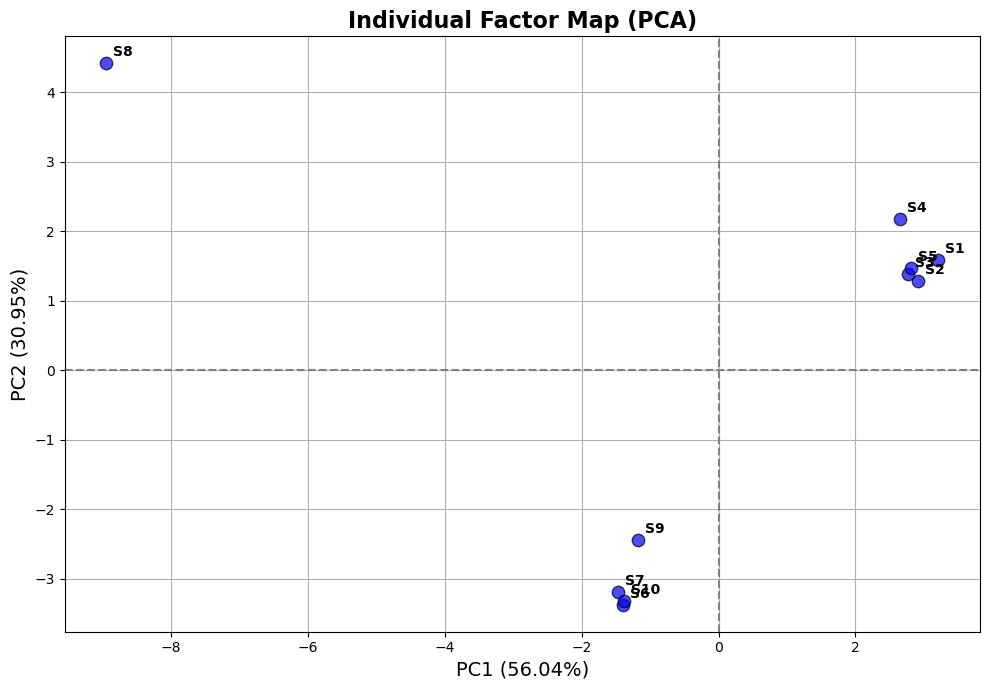

Individual Factor Map saved at: C:\Users\New User\Documents\priyanka\individual_factor_map.png


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load dataset
csv_file = "C:\\Users\\New User\\Documents\\priyanka\\amino.csv"
df = pd.read_csv(csv_file)

# Extract numeric data (assuming first column is ID)
numeric_data = df.iloc[:, 1:]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# PCA transformation
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=["PC1", "PC2"])
pca_df["Label"] = ["S" + str(i+1) for i in range(len(pca_df))]

# Plot Individual Factor Map
plt.figure(figsize=(10, 7))
plt.scatter(pca_df["PC1"], pca_df["PC2"], color='blue', alpha=0.7, s=80, edgecolors='black')

# Add text labels
for i in range(len(pca_df)):
    plt.text(pca_df["PC1"][i] + 0.1, pca_df["PC2"][i] + 0.1, pca_df["Label"][i],
             fontsize=10, fontweight='bold')

# Axes labels and aesthetics
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)", fontsize=14)
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)", fontsize=14)
plt.title("Individual Factor Map (PCA)", fontsize=16, fontweight='bold')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()

# Save the plot
plot_file = "C:\\Users\\New User\\Documents\\priyanka\\individual_factor_map.png"
plt.savefig(plot_file, dpi=300)
plt.show()

print(f"Individual Factor Map saved at: {plot_file}")


C:\CondaEnvs\rdkit-env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


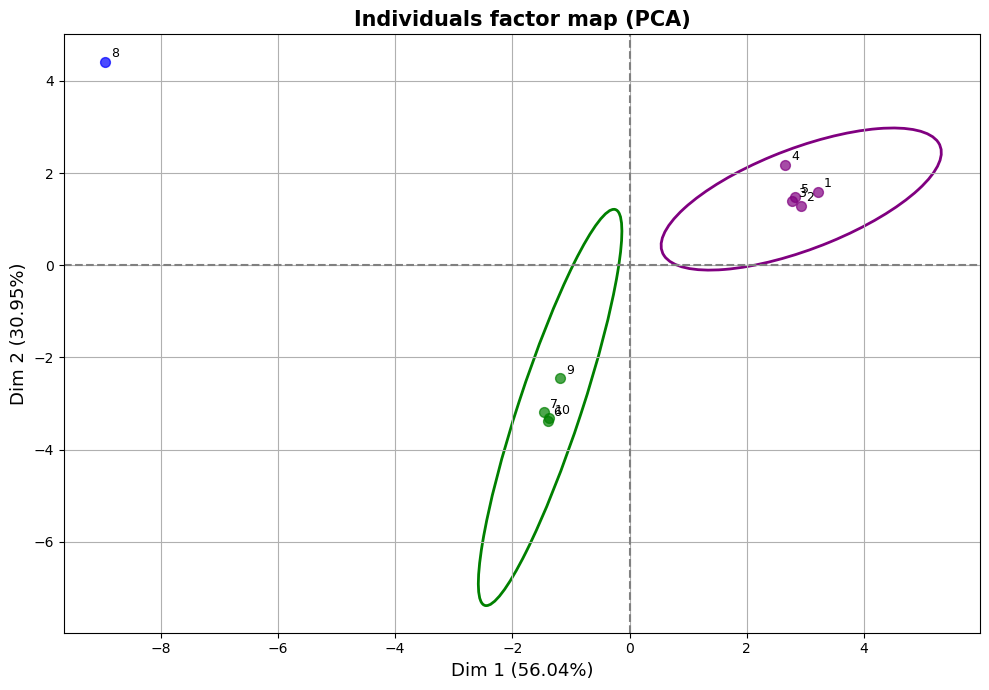

✅ Individuals Factor Map saved at: C:\Users\New User\Documents\priyanka\individuals_factor_map_with_ellipses.png


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load dataset
csv_file = "C:\\Users\\New User\\Documents\\priyanka\\amino.csv"
df = pd.read_csv(csv_file)

# Extract numeric data (assuming first column is ID or name)
numeric_data = df.iloc[:, 1:]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# PCA transformation
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=["PC1", "PC2"])
pca_df["Label"] = [str(i + 1) for i in range(len(pca_df))]

# KMeans clustering (for ellipse groups)
kmeans = KMeans(n_clusters=4, random_state=42)
pca_df["Cluster"] = kmeans.fit_predict(pca_result)

# Plot setup
fig, ax = plt.subplots(figsize=(10, 7))
colors = ['red', 'green', 'blue', 'purple']

# Scatter points (override color for point #4 to purple)
for i, row in pca_df.iterrows():
    point_label = row["Label"]
    cluster_id = row["Cluster"]
    # If point label is '4', force color to purple
    if point_label == "4":
        point_color = 'purple'
    else:
        point_color = colors[cluster_id]
    ax.scatter(row["PC1"], row["PC2"], color=point_color, s=50, alpha=0.7)

# Draw ellipses for each cluster
for cluster_id in sorted(pca_df["Cluster"].unique()):
    cluster_data = pca_df[pca_df["Cluster"] == cluster_id]

    if len(cluster_data) >= 2:
        cov = np.cov(cluster_data[["PC1", "PC2"]].T)
        if not np.isnan(cov).any() and not np.isinf(cov).any():
            lambda_, v = np.linalg.eig(cov)
            lambda_ = np.sqrt(lambda_)
            center = cluster_data[["PC1", "PC2"]].mean().values

            # Base multiplier for all clusters
            size_multiplier = 20
            # Purple cluster gets bigger ellipse
            if cluster_id == 3:
                size_multiplier = 24

            ellipse = Ellipse(
                xy=center,
                width=lambda_[0] * size_multiplier,
                height=lambda_[1] * size_multiplier,
                angle=np.rad2deg(np.arccos(v[0, 0])),
                edgecolor=colors[cluster_id],
                fc='none', lw=2
            )
            ax.add_patch(ellipse)

# Add point labels
for i in range(len(pca_df)):
    ax.text(pca_df["PC1"][i] + 0.1, pca_df["PC2"][i] + 0.1, pca_df["Label"][i],
            fontsize=9)

# Axis and title
plt.xlabel(f"Dim 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)", fontsize=13)
plt.ylabel(f"Dim 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)", fontsize=13)
plt.title("Individuals factor map (PCA)", fontsize=15, fontweight='bold')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()

# Save and show
output_file = "C:\\Users\\New User\\Documents\\priyanka\\individuals_factor_map_with_ellipses.png"
plt.savefig(output_file, dpi=300)
plt.show()

print(f"✅ Individuals Factor Map saved at: {output_file}")
